In [1]:
import pandas as pd
import warnings


In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')

### Missing Value Analysis & Imputation

This section identifies and handles missing values in the dataset. 
For categorical columns such as `Teacher_Quality`, `Parental_Education_Level`, and `Distance_from_Home`, we use the mode (most frequent value) to impute missing values. 
This is a reasonable approach when the categorical data is not ordinal or heavily imbalanced.


In [3]:
# Check missing values
warnings.filterwarnings('ignore')  # Suppress all warnings

missing_values = df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

# Fill missing categorical values with mode
categorical_cols_with_na = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
for col in categorical_cols_with_na:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)


Missing values:
 Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


### Ordinal Encoding of Ordered Categorical Variables and One-Hot Encoding of Nominal Categorical Variables

Some categorical features have an inherent order and are encoded accordingly using ordinal values.
This helps preserve the relative ranking between categories in the model.

Nominal (unordered) categorical features are converted into binary columns using one-hot encoding. 
This avoids introducing any artificial ordinal relationships between the categories. 
Warnings are suppressed to keep the notebook output clean and readable.


In [4]:
import warnings
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

warnings.filterwarnings('ignore')  # Clean output

# Ordinal features and their correct orderings
ordinal_columns = {
    'Motivation_Level': ['Very Low', 'Low', 'Medium', 'High', 'Very High'],
    'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],
    'Family_Income': ['Low', 'Medium', 'High'],
    'Access_to_Resources': ['Low', 'Medium', 'High'],
    'Distance_from_Home': ['Far', 'Moderate', 'Near']
}

# Apply ordinal encoding
for col, order in ordinal_columns.items():
    encoder = OrdinalEncoder(categories=[order])
    df[col] = encoder.fit_transform(df[[col]])

# Remaining nominal features to label encode
nominal_cols = [
    'Parental_Involvement', 'Extracurricular_Activities', 'Internet_Access',
    'Teacher_Quality', 'School_Type', 'Peer_Influence', 
    'Learning_Disabilities', 'Gender'
]

# Apply label encoding in-place
for col in nominal_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


### Step 1: Categorical Feature Impact on Exam Score

In this section, we analyze the impact of each categorical variable on `Exam_Score`.  
For each variable:
- We calculate the mean exam score for each category.
- We visualize the distribution using boxplots.
- We perform an ANOVA test to check if the observed differences are statistically significant.



===== Parental_Involvement =====
Mean Exam Score by category:
Parental_Involvement
0    68.092767
1    66.358265
2    67.098156
Name: Exam_Score, dtype: float64

ANOVA p-value: 0.0000 → Significant


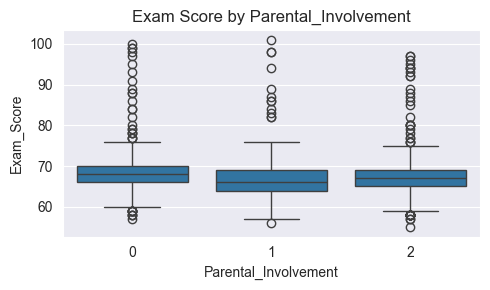


===== Access_to_Resources =====
Mean Exam Score by category:
Access_to_Resources
0.0    66.203351
1.0    67.134378
2.0    68.092152
Name: Exam_Score, dtype: float64

ANOVA p-value: 0.0000 → Significant


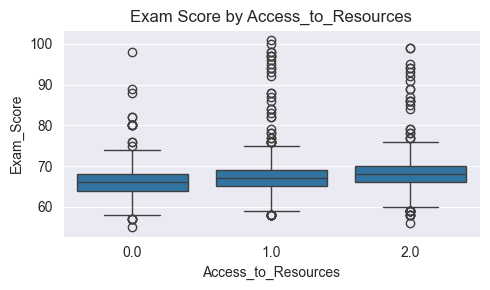


===== Extracurricular_Activities =====
Mean Exam Score by category:
Extracurricular_Activities
0    66.931435
1    67.441849
Name: Exam_Score, dtype: float64

ANOVA p-value: 0.0000 → Significant


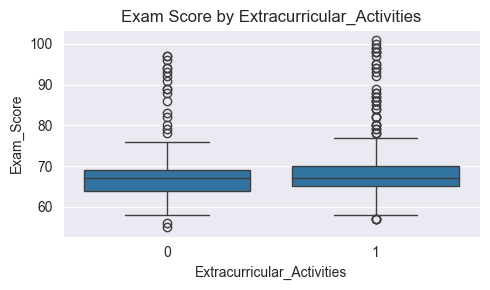


===== Motivation_Level =====
Mean Exam Score by category:
Motivation_Level
1.0    66.752194
2.0    67.330648
3.0    67.704321
Name: Exam_Score, dtype: float64

ANOVA p-value: 0.0000 → Significant


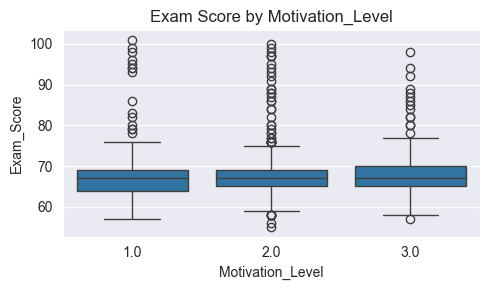


===== Internet_Access =====
Mean Exam Score by category:
Internet_Access
0    66.535070
1    67.292895
Name: Exam_Score, dtype: float64

ANOVA p-value: 0.0000 → Significant


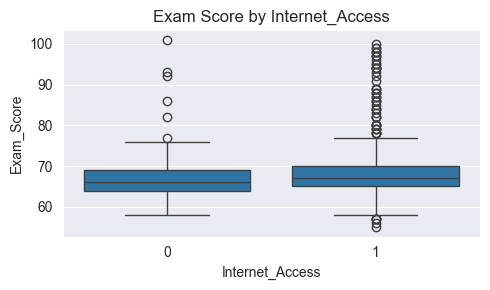


===== Family_Income =====
Mean Exam Score by category:
Family_Income
0.0    66.848428
1.0    67.334959
2.0    67.842396
Name: Exam_Score, dtype: float64

ANOVA p-value: 0.0000 → Significant


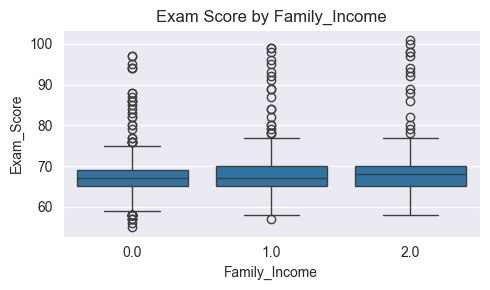


===== Teacher_Quality =====
Mean Exam Score by category:
Teacher_Quality
0    67.676939
1    66.753425
2    67.100175
Name: Exam_Score, dtype: float64

ANOVA p-value: 0.0000 → Significant


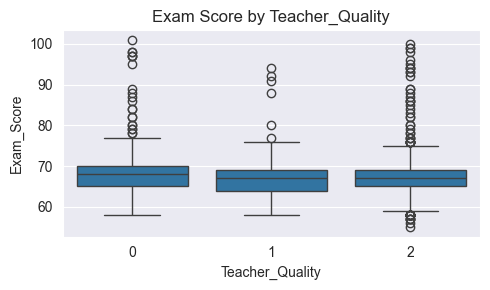


===== School_Type =====
Mean Exam Score by category:
School_Type
0    67.287705
1    67.212919
Name: Exam_Score, dtype: float64

ANOVA p-value: 0.4723 → Not Significant


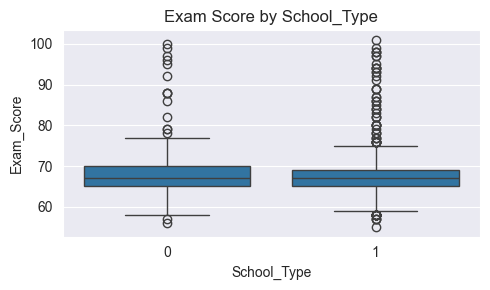


===== Peer_Influence =====
Mean Exam Score by category:
Peer_Influence
0    66.564270
1    67.197917
2    67.623199
Name: Exam_Score, dtype: float64

ANOVA p-value: 0.0000 → Significant


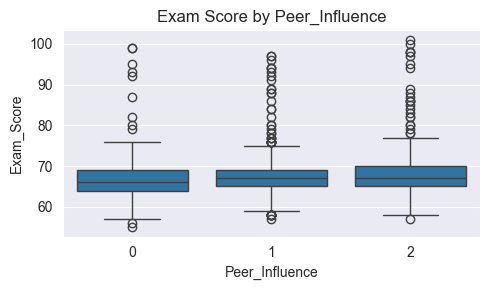


===== Learning_Disabilities =====
Mean Exam Score by category:
Learning_Disabilities
0    67.349120
1    66.270504
Name: Exam_Score, dtype: float64

ANOVA p-value: 0.0000 → Significant


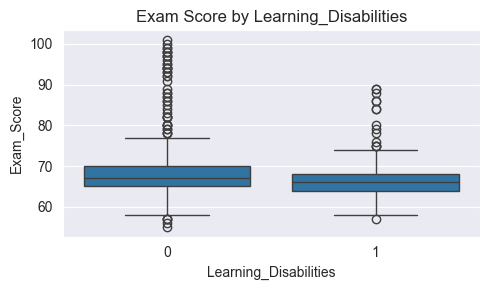


===== Parental_Education_Level =====
Mean Exam Score by category:
Parental_Education_Level
0.0    66.897978
1.0    67.315737
2.0    67.970881
Name: Exam_Score, dtype: float64

ANOVA p-value: 0.0000 → Significant


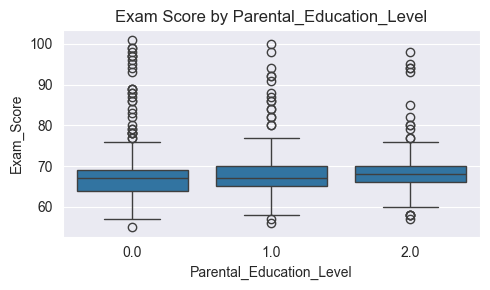


===== Distance_from_Home =====
Mean Exam Score by category:
Distance_from_Home
0.0    66.457447
1.0    66.981481
2.0    67.493799
Name: Exam_Score, dtype: float64

ANOVA p-value: 0.0000 → Significant


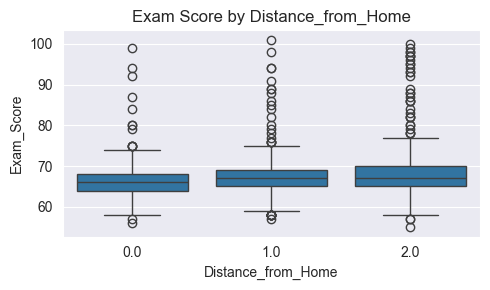


===== Gender =====
Mean Exam Score by category:
Gender
0    67.244898
1    67.228894
Name: Exam_Score, dtype: float64

ANOVA p-value: 0.8688 → Not Significant


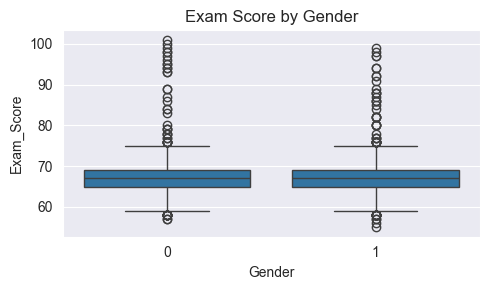

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# List of categorical columns
categorical_columns = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]

for col in categorical_columns:
    print(f"\n===== {col} =====")
    
    # 1. Grouped means
    group_means = df.groupby(col)['Exam_Score'].mean()
    print("Mean Exam Score by category:")
    print(group_means)
    
    # 2. ANOVA test
    groups = [group['Exam_Score'].values for name, group in df.groupby(col)]
    stat, p = f_oneway(*groups)
    print(f"\nANOVA p-value: {p:.4f} → {'Significant' if p < 0.05 else 'Not Significant'}")
    
    # 3. Boxplot
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=col, y='Exam_Score', data=df)
    plt.title(f'Exam Score by {col}')
    plt.tight_layout()
    plt.show()
    
 

### Step 2: Numerical Feature Impact on Exam Score

In this section, we evaluate the influence of numerical features on `Exam_Score`.  
We compute both Pearson and Spearman correlation coefficients to assess linear and monotonic relationships.  
We also visualize the relationships using scatter plots to observe the trends and outliers.


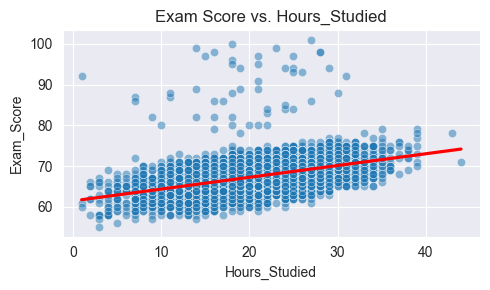

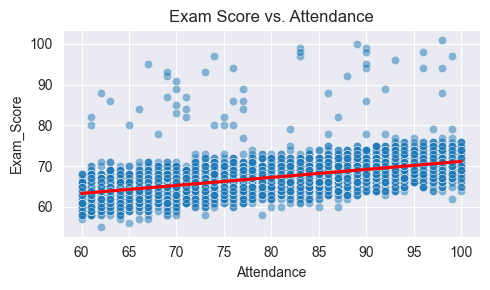

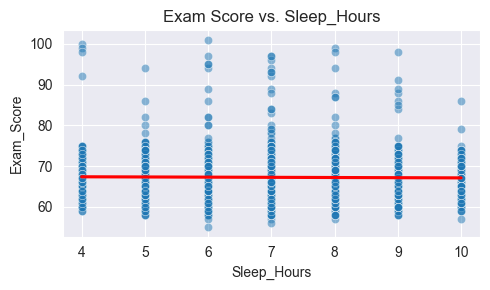

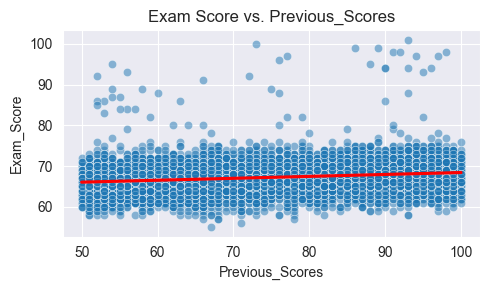

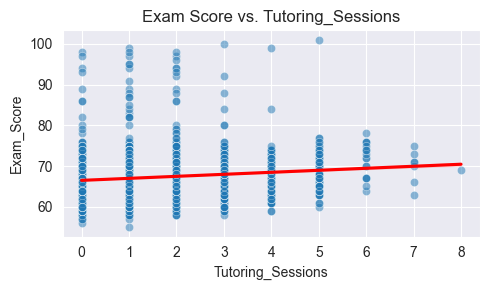

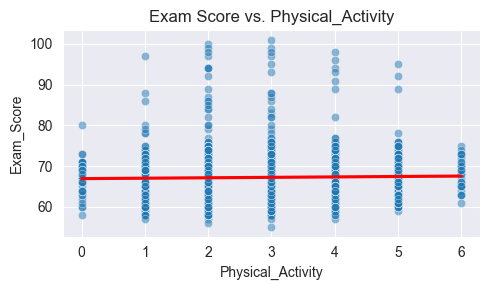


=== Numerical Feature Correlation Summary ===
          Feature  Pearson Correlation  Spearman Correlation
       Attendance                0.581                 0.672
    Hours_Studied                0.445                 0.481
  Previous_Scores                0.175                 0.192
Tutoring_Sessions                0.157                 0.164
Physical_Activity                0.028                 0.029
      Sleep_Hours               -0.017                -0.008


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import pandas as pd

# Numerical columns (excluding target)
numerical_columns = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
    'Tutoring_Sessions', 'Physical_Activity'
]

# Store results
correlation_results = []

for col in numerical_columns:
    pearson_corr, _ = pearsonr(df[col], df['Exam_Score'])
    spearman_corr, _ = spearmanr(df[col], df['Exam_Score'])
    
    correlation_results.append({
        'Feature': col,
        'Pearson Correlation': round(pearson_corr, 3),
        'Spearman Correlation': round(spearman_corr, 3)
    })
    
    # Scatterplot
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=col, y='Exam_Score', data=df, alpha=0.5)
    sns.regplot(x=col, y='Exam_Score', data=df, scatter=False, color='red')
    plt.title(f'Exam Score vs. {col}')
    plt.tight_layout()
    plt.show()

# Show summary table
correlation_df = pd.DataFrame(correlation_results).sort_values(by='Pearson Correlation', ascending=False)
print("\n=== Numerical Feature Correlation Summary ===")
print(correlation_df.to_string(index=False))


In [7]:
# Outlier Removal Using IQR Method
def remove_outliers_iqr(df, columns, k=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - k * IQR
        upper = Q3 + k * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

numeric_cols = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
    'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'
]

df_clean = remove_outliers_iqr(df, numeric_cols)

print(f"Original size: {df.shape[0]} → Cleaned size: {df_clean.shape[0]}")


Original size: 6607 → Cleaned size: 6054


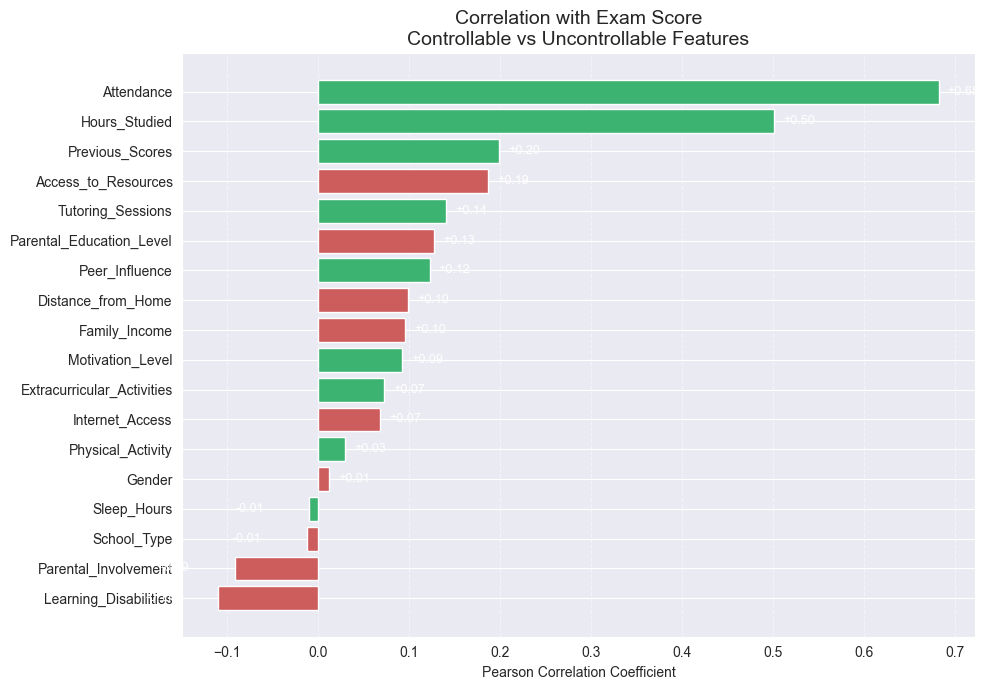

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 🔹 Değişken grupları
controllable = [
    'Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions',
    'Motivation_Level', 'Extracurricular_Activities','Peer_Influence', 'Sleep_Hours', 'Physical_Activity'
]

uncontrollable = [
    'Family_Income', 'Parental_Education_Level', 'Parental_Involvement',
    'Access_to_Resources', 'Distance_from_Home', 'Learning_Disabilities',
    'Gender', 'School_Type', 'Internet_Access', 
]

# 🔍 Korelasyon hesaplama
results = []
for col in controllable + uncontrollable:
    corr, _ = pearsonr(df_clean[col], df_clean['Exam_Score'])
    results.append({
        'Feature': col,
        'Correlation': round(corr, 3),
        'Group': 'Controllable' if col in controllable else 'Uncontrollable'
    })

# 🔄 DataFrame
df_corr = pd.DataFrame(results).sort_values(by='Correlation', ascending=True)

# 🎨 Renk seçimi
colors = df_corr['Group'].map({
    'Controllable': 'mediumseagreen',
    'Uncontrollable': 'indianred'
})

# 📈 Grafik
plt.figure(figsize=(10, 7))
bars = plt.barh(df_corr['Feature'], df_corr['Correlation'], color=colors)

# Değerleri ekle
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01 if width > 0 else width - 0.05,
             bar.get_y() + bar.get_height()/2,
             f"{width:+.2f}", va='center', ha='left' if width > 0 else 'right', fontsize=9, color='white')

plt.title("Correlation with Exam Score\nControllable vs Uncontrollable Features", fontsize=14)
plt.xlabel("Pearson Correlation Coefficient")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Ridge Regression for Interpretable Feature Effects (Cleaned Data)

This analysis presents Ridge Regression results using a dataset where outliers in numerical features have been removed.  
All features were standardized prior to training to ensure the comparability of coefficient magnitudes.  
Positive coefficients indicate a positive contribution to `Exam_Score`, while negative coefficients suggest a negative effect.

In [8]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Feature & target separation
X = df_clean.drop(columns=['Exam_Score'])
y = df_clean['Exam_Score']

# 2. Standardize features for coefficient comparability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_scaled, y)

# 4. Coefficient summary
coefs = pd.Series(ridge_model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(key=abs, ascending=False)

# Display
print("\n=== Ridge Regression Coefficients ===")
print(coefs_sorted.to_string())



=== Ridge Regression Coefficients ===
Attendance                    2.285083
Hours_Studied                 1.710573
Previous_Scores               0.692035
Access_to_Resources           0.679732
Tutoring_Sessions             0.496590
Peer_Influence                0.388752
Parental_Education_Level      0.381465
Family_Income                 0.370398
Parental_Involvement         -0.358678
Motivation_Level              0.335196
Distance_from_Home            0.333838
Learning_Disabilities        -0.305355
Internet_Access               0.276489
Extracurricular_Activities    0.245418
Physical_Activity             0.239135
Teacher_Quality              -0.193703
Sleep_Hours                   0.023904
School_Type                  -0.012145
Gender                       -0.005044


### Ridge Regression for Interpretable Feature Effects (Cleaned Data)

This analysis presents Ridge Regression results using a dataset where outliers in numerical features have been removed.  
All features were standardized prior to training to ensure the comparability of coefficient magnitudes.  
Positive coefficients indicate a positive contribution to `Exam_Score`, while negative coefficients suggest a negative effect.

---

### 🔝 Top Influential Features

#### 1. **Attendance** (+2.29)
> Attendance is the most influential factor in predicting exam performance. As attendance increases, scores improve significantly.

#### 2. **Hours_Studied** (+1.71)
> Study time has a strong positive effect. Students who invest more time in studying tend to perform better.

#### 3. **Previous_Scores** (+0.69)
> Previous academic performance remains a meaningful predictor, indicating some consistency in student outcomes.

#### 4. **Access_to_Resources** (+0.68)
> Better access to academic resources (books, internet, tools) is associated with higher scores.

#### 5. **Tutoring_Sessions** (+0.50)
> Receiving tutoring support contributes positively, though the effect is smaller than that of core behavioral factors.

---

### 🟡 Moderate Contributors

#### 6. **Peer_Influence** (+0.39)
> Positive peer influence correlates with improved performance, supporting the role of social environment.

#### 7. **Parental_Education_Level** (+0.38)
> Students with more educated parents show moderately higher scores.

#### 8. **Family_Income** (+0.37)
> Income level has a moderate impact, possibly reflecting access to better environments or opportunities.

#### 9. **Parental_Involvement** (−0.36)
> The negative coefficient may reflect reactive involvement, where parents become more engaged when students are already struggling.

#### 10. **Motivation_Level** (+0.34)
> Motivation shows a moderate positive effect, though slightly weaker than resource-related and behavioral features.

---

### 🟢 Minor Positive Effects

#### 11. **Distance_from_Home** (+0.33)
> Students living closer to school tend to perform slightly better, potentially due to less commute fatigue.

#### 12. **Learning_Disabilities** (−0.31)
> Learning disabilities are associated with a moderate reduction in scores.

#### 13. **Internet_Access** (+0.28)
> Internet access shows a small but consistent positive contribution to academic performance.

#### 14. **Extracurricular_Activities** (+0.25)
> Participation in extracurricular activities has a minor positive effect.

#### 15. **Physical_Activity** (+0.24)
> Physical activity contributes positively in a small but noticeable way.

---

### ⚪ Features with Negligible or No Impact

#### 16. **Teacher_Quality** (−0.19)
> Teacher quality shows a weak negative coefficient in this model.

#### 17. **Sleep_Hours** (+0.02)
> Sleep duration has a minimal positive association with exam score.

#### 18. **School_Type** (−0.01)
> No notable difference observed between public and private school types.

#### 19. **Gender** (−0.01)
> Gender has no significant effect on exam score in this dataset.

---

### 🧠 Conclusion

The cleaned Ridge model reinforces the importance of **attendance**, **study time**, and **resource access** in student performance.  
Parental and environmental factors show moderate but consistent effects.  
Other variables such as school type, gender, and sleep show minimal or no measurable influence.

These results provide a clear framework for prioritizing interventions aimed at improving academic outcomes.


### Performance-Oriented Predictive Modeling with LightGBM

We now shift from interpretability to prediction accuracy.  
Using the cleaned dataset (`df_clean`) and the most relevant features identified during analysis,  
we train a LightGBM regression model to predict `Exam_Score`.  
Initial performance is evaluated using RMSE and R² on a hold-out test set.


In [9]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Selected features based on previous analysis
selected_features = [
    'Attendance', 'Hours_Studied', 'Previous_Scores', 'Access_to_Resources',
    'Tutoring_Sessions', 'Parental_Education_Level', 'Motivation_Level',
    'Family_Income', 'Peer_Influence', 'Distance_from_Home', 'Learning_Disabilities'
]

# Feature matrix and target
X = df_clean[selected_features]
y = df_clean['Exam_Score']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

# Prediction
y_pred = lgbm_model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"LightGBM RMSE: {rmse:.2f}")
print(f"LightGBM R² Score: {r2:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 4843, number of used features: 11
[LightGBM] [Info] Start training from score 66.969647
LightGBM RMSE: 1.03
LightGBM R² Score: 0.8943


### Visulizaiton

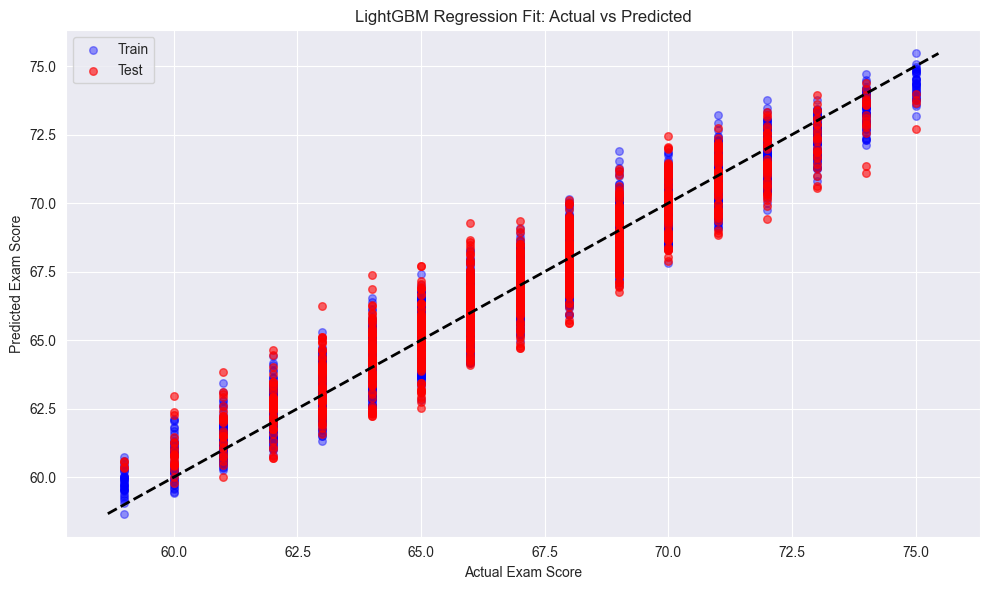

In [10]:
import matplotlib.pyplot as plt

# Train set predictions
y_train_pred = lgbm_model.predict(X_train)

plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_train_pred, label='Train', alpha=0.4, color='blue', s=30)

plt.scatter(y_test, y_pred, label='Test', alpha=0.6, color='red', s=30)

min_val = min(y.min(), y_pred.min(), y_train_pred.min())
max_val = max(y.max(), y_pred.max(), y_train_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

# Grafiği etiketle
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('LightGBM Regression Fit: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [11]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
import numpy as np

# Use the previously selected best parameters, or default for baseline
lgbm_cv_model = LGBMRegressor(
    learning_rate=0.1,
    max_depth=-1,
    n_estimators=100,
    random_state=42
)

# Cross-validation with R² scoring
r2_scores = cross_val_score(lgbm_cv_model, X, y, cv=5, scoring='r2')


print(f"Mean R²: {r2_scores.mean():.4f}")
print(f"Std Dev: {r2_scores.std():.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 4843, number of used features: 11
[LightGBM] [Info] Start training from score 66.992980
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 4843, number of used features: 11
[LightGBM] [Info] Start training from score 66.956225
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

### Model with Uncontrollable features

In [12]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Only uncontrollable environmental features
env_features = [
    'Family_Income', 'Parental_Education_Level', 'Parental_Involvement',
    'Access_to_Resources', 'Distance_from_Home', 'Learning_Disabilities',
    'Gender', 'School_Type', 'Internet_Access', 'Peer_Influence'
]

X_env = df_clean[env_features]
y_env = df_clean['Exam_Score']

X_train_env, X_test_env, y_train_env, y_test_env = train_test_split(X_env, y_env, test_size=0.2, random_state=42)

model_env = LGBMRegressor(random_state=42)
model_env.fit(X_train_env, y_train_env)

y_pred_env = model_env.predict(X_test_env)
rmse_env = np.sqrt(mean_squared_error(y_test_env, y_pred_env))
r2_env = r2_score(y_test_env, y_pred_env)

print(f"Environmental Model R² Score: {r2_env:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26
[LightGBM] [Info] Number of data points in the train set: 4843, number of used features: 10
[LightGBM] [Info] Start training from score 66.969647
Environmental Model R² Score: 0.0890


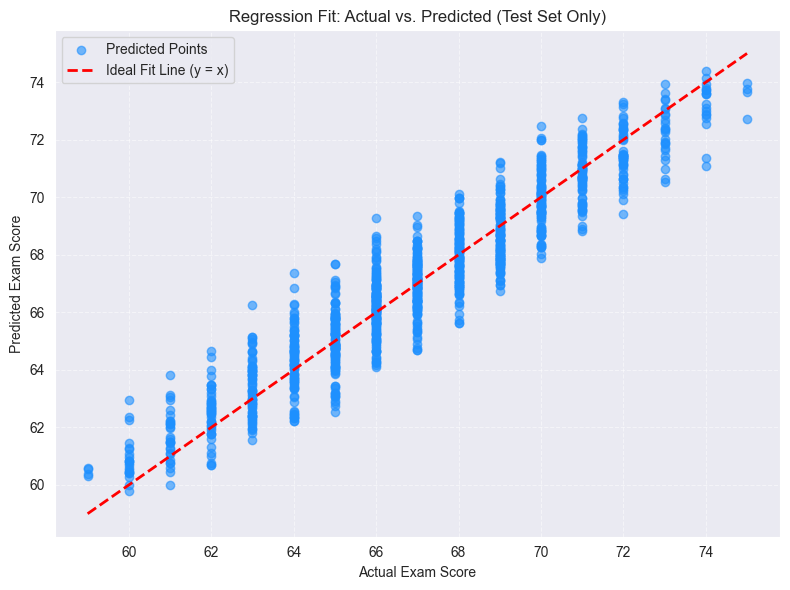

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Gerçek ve tahmin değerlerini numpy array'e dönüştür
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

# Grafik
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, alpha=0.6, color='dodgerblue', label='Predicted Points')
plt.plot([y_test_np.min(), y_test_np.max()],
         [y_test_np.min(), y_test_np.max()],
         'r--', lw=2, label='Ideal Fit Line (y = x)')

# Etiketler
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Regression Fit: Actual vs. Predicted (Test Set Only)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [14]:
from scipy.stats import pearsonr, spearmanr
import pandas as pd

# Kontrol edilemeyen feature listesi
env_features = [
    'Family_Income', 'Parental_Education_Level', 'Parental_Involvement',
    'Access_to_Resources', 'Distance_from_Home', 'Learning_Disabilities',
    'Gender', 'School_Type', 'Internet_Access', 'Peer_Influence'
]

# Sonuçları tut
correlation_results = []

for col in env_features:
    pearson_corr, _ = pearsonr(df_clean[col], df_clean['Exam_Score'])
    spearman_corr, _ = spearmanr(df_clean[col], df_clean['Exam_Score'])
    
    correlation_results.append({
        'Feature': col,
        'Pearson Correlation': round(pearson_corr, 3),
        'Spearman Correlation': round(spearman_corr, 3)
    })

# DataFrame olarak sırala
cor_df = pd.DataFrame(correlation_results).sort_values(by='Pearson Correlation', ascending=False)

# Göster
print("\n=== Correlation Summary for Uncontrollable Features ===")
print(cor_df.to_string(index=False))



=== Correlation Summary for Uncontrollable Features ===
                 Feature  Pearson Correlation  Spearman Correlation
     Access_to_Resources                0.187                 0.185
Parental_Education_Level                0.128                 0.118
          Peer_Influence                0.123                 0.119
      Distance_from_Home                0.099                 0.095
           Family_Income                0.096                 0.096
         Internet_Access                0.069                 0.066
                  Gender                0.013                 0.015
             School_Type               -0.012                -0.011
    Parental_Involvement               -0.091                -0.076
   Learning_Disabilities               -0.109                -0.105


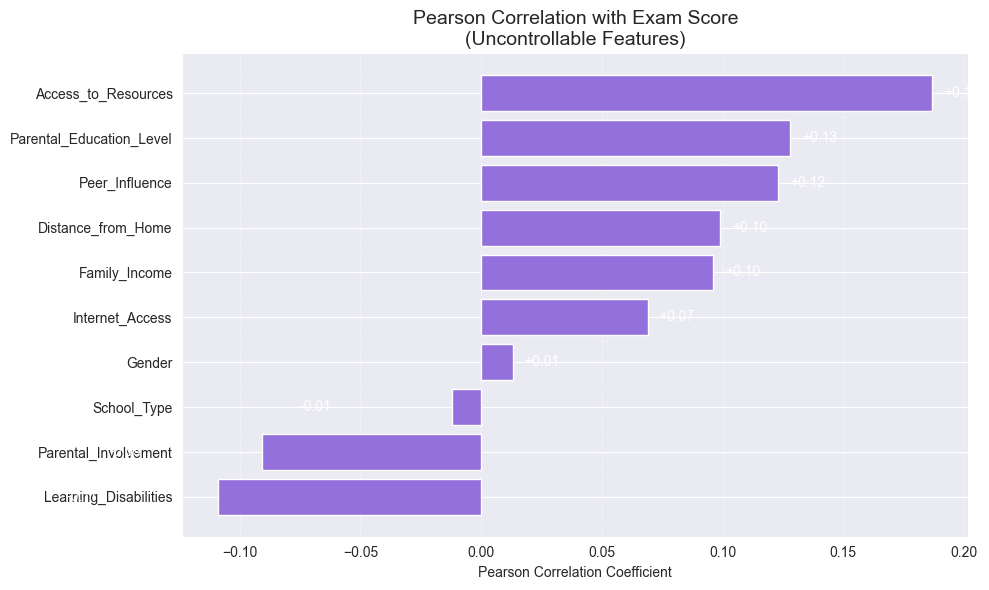

In [16]:
import matplotlib.pyplot as plt

# Veriyi sıralayarak barplot için hazırla
cor_df_sorted = cor_df.sort_values(by='Pearson Correlation', ascending=True)

# Grafik
plt.figure(figsize=(10, 6))
bars = plt.barh(cor_df_sorted['Feature'], cor_df_sorted['Pearson Correlation'], color='mediumpurple')

# Değerleri barların üstüne yaz
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005 if width > 0 else width - 0.05,
             bar.get_y() + bar.get_height() / 2,
             f"{width:+.2f}",
             va='center', ha='left' if width > 0 else 'right', color='white', fontsize=10)

# Stil ayarları
plt.title("Pearson Correlation with Exam Score\n(Uncontrollable Features)", fontsize=14)
plt.xlabel("Pearson Correlation Coefficient")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## 📈 Correlation Analysis of Uncontrollable Features

To quantify the impact of uncontrollable variables on student performance, we computed both **Pearson** and **Spearman** correlations between each feature and `Exam_Score`.

| Feature                    | Pearson Correlation | Spearman Correlation |
|----------------------------|---------------------|----------------------|
| Access_to_Resources        | **+0.187**           | +0.185               |
| Parental_Education_Level   | +0.128               | +0.118               |
| Peer_Influence             | +0.123               | +0.119               |
| Distance_from_Home         | +0.099               | +0.095               |
| Family_Income              | +0.096               | +0.096               |
| Internet_Access            | +0.069               | +0.066               |
| Gender                     | +0.013               | +0.015               |
| School_Type                | −0.012               | −0.011               |
| Parental_Involvement       | −0.091               | −0.076               |
| Learning_Disabilities      | −0.109               | −0.105               |

### 🔍 Key Insights:
- The **strongest positive correlation** is observed with `Access_to_Resources` (**r ≈ 0.19**), followed by `Parental_Education_Level` and `Peer_Influence`.
- Variables like `Distance_from_Home` and `Family_Income` show modest positive associations with exam performance.
- `Learning_Disabilities` and `Parental_Involvement` are **negatively correlated**, potentially indicating academic disadvantages or intervention-related reverse effects.
- `Gender` and `School_Type` show **negligible correlations**, suggesting minimal impact on scores after controlling for other factors.

📌 These findings reinforce the predictive model's results: **environmental conditions alone** can explain a substantial portion of exam performance, highlighting the role of educational equity.


### 📊 Feature Effects from Ridge Regression

The chart below visualizes the standardized coefficients from the Ridge Regression model (trained on outlier-cleaned data).  
Each bar represents the direction and strength of a feature’s impact on `Exam_Score`.  
Positive values indicate supportive influence, while negative values suggest a potential hindering effect.

Notably, features like **Attendance** and **Hours Studied** have the strongest positive impact,  
whereas variables like **Learning Disabilities** and **Parental Involvement** show mild negative effects.


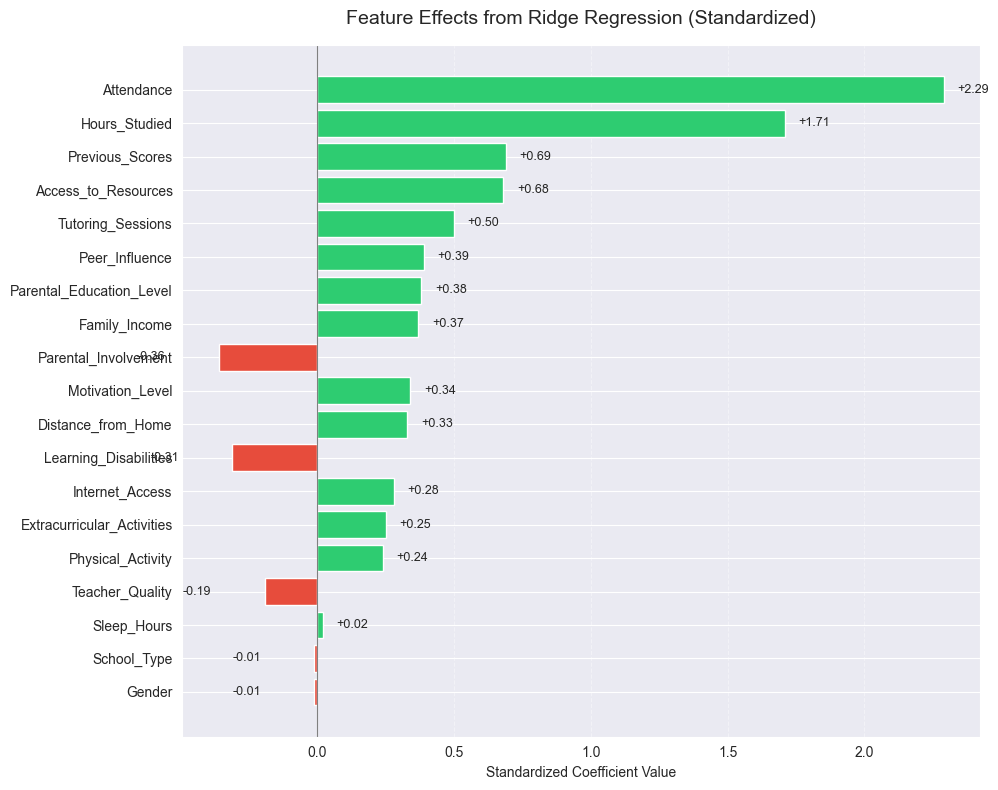

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

features = [
    'Attendance', 'Hours_Studied', 'Previous_Scores', 'Access_to_Resources', 'Tutoring_Sessions',
    'Peer_Influence', 'Parental_Education_Level', 'Family_Income', 'Parental_Involvement', 'Motivation_Level',
    'Distance_from_Home', 'Learning_Disabilities', 'Internet_Access', 'Extracurricular_Activities', 'Physical_Activity',
    'Teacher_Quality', 'Sleep_Hours', 'School_Type', 'Gender'
]

coefficients = [
    2.29, 1.71, 0.69, 0.68, 0.50,
    0.39, 0.38, 0.37, -0.36, 0.34,
    0.33, -0.31, 0.28, 0.25, 0.24,
    -0.19, 0.02, -0.01, -0.01
]

df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
df = df.sort_values(by='Coefficient', key=abs, ascending=True)

plt.figure(figsize=(10, 8))
bars = plt.barh(df['Feature'], df['Coefficient'], color=['#2ecc71' if v > 0 else '#e74c3c' for v in df['Coefficient']])
plt.axvline(0, color='gray', linewidth=0.8)
plt.title('Feature Effects from Ridge Regression (Standardized)', fontsize=14, pad=15)
plt.xlabel('Standardized Coefficient Value')
plt.tight_layout()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05 if width > 0 else width - 0.3,
             bar.get_y() + bar.get_height()/2,
             f'{width:+.2f}',
             va='center', fontsize=9)

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()


### 🧭 Data-Driven Recommendations for Early Support

Based on the predictive model and feature effect analysis, the following recommendations are proposed to help teachers proactively identify and support students at risk of academic struggle:

- **Track and prioritize attendance**:  
  Since attendance is the most powerful predictor of performance, even slight drops in attendance may signal the need for intervention.

- **Monitor study time or homework submission frequency**:  
  Hours studied significantly influence scores. Students who appear disengaged outside of class may benefit from personalized study plans or after-school programs.

- **Use previous academic performance as a benchmark, not a verdict**:  
  While past scores are useful, they do not fully determine current outcomes. Students with low prior performance but strong study habits may be on a recovery path.

- **Assess access to learning resources**:  
  Students with limited access to books, digital tools, or stable environments should be provided with institutional support to level the playing field.

- **Pay attention to tutoring engagement**:  
  While not as dominant as other factors, tutoring sessions still positively impact performance. A lack of participation in available support services may indicate hidden difficulties.

- **Be aware of peer influence patterns**:  
  Students who are part of academically disengaged peer groups may require additional encouragement or positive peer modeling.

- **Watch for students with learning difficulties — even if they have average scores**:  
  The model shows that learning disabilities are associated with a measurable drop in performance. Early detection and accommodations are essential.

- **Don’t overinterpret parental involvement**:  
  Higher involvement may sometimes reflect parental response to poor performance rather than a cause of it. Use this variable in context with other indicators.

- **Disregard gender or school type as predictors**:  
  The analysis shows no meaningful performance differences based on gender or school type, suggesting equal expectations should apply.

These data-backed signals allow teachers to intervene early — not by reacting to poor test scores, but by recognizing the behavioral and contextual patterns that typically precede them.
